<a href="https://colab.research.google.com/github/anshika0601/ml-learn/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Checking for four assumptions of linear regression

Intercept: 3.4301923150935014
Slope: 1.908045354575393


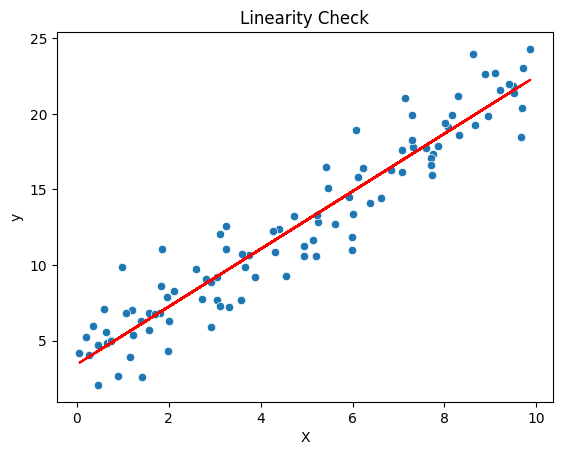

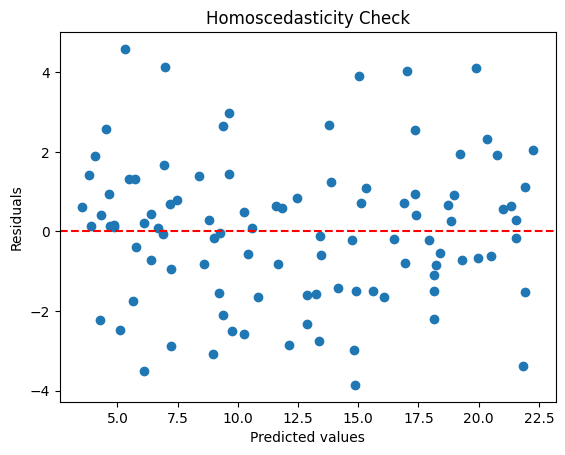

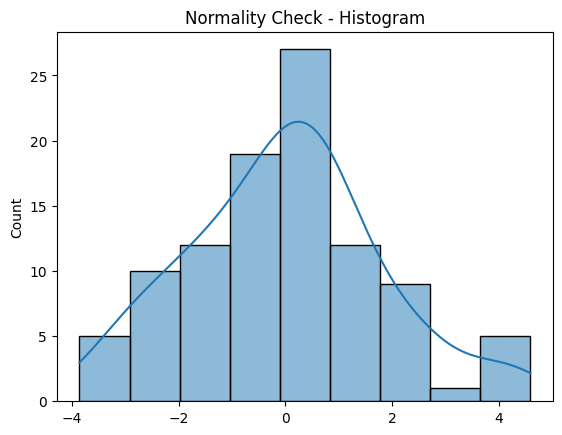

In [2]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

# Step 2: Create sample dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10    # independent variable
y = 3 + 2 * X.flatten() + np.random.randn(100) * 2   # linear relation + noise

# Convert to DataFrame
data = pd.DataFrame({'X': X.flatten(), 'y': y})

# Step 3: Fit Linear Regression using sklearn
model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])


#linearity
sns.scatterplot(x="X", y="y", data=data)
plt.plot(data["X"], model.predict(X), color="red")  # regression line
plt.title("Linearity Check")
plt.show()

#for this simple dataset independence is assumed otherwise we havedurbin waston test

# homoscedasticity
residuals = y - model.predict(X)
plt.scatter(model.predict(X), residuals)
plt.axhline(y=0, color="red", linestyle="--")
plt.title("Homoscedasticity Check")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

#normality of error
# Histogram
sns.histplot(residuals, kde=True)
plt.title("Normality Check - Histogram")
plt.show()


Implementation on boston housing


In [13]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame  # pandas DataFrame
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


Intercept: -37.02327770606409
Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
MSE: 0.5558915986952444
RMSE: 0.7455813830127764
R²: 0.5757877060324508
      Feature  Coefficient
3   AveBedrms     0.783145
0      MedInc     0.448675
1    HouseAge     0.009724
4  Population    -0.000002
5    AveOccup    -0.003526
2    AveRooms    -0.123323
6    Latitude    -0.419792
7   Longitude    -0.433708


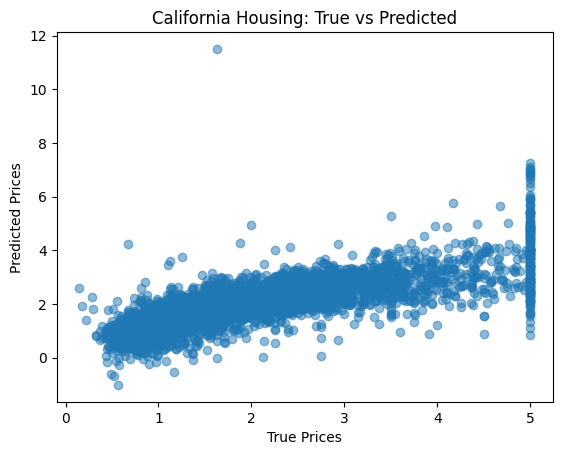

In [14]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print("Intercept:", lin_reg.intercept_)
print("Coefficients:", lin_reg.coef_)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lin_reg.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coef_df)


import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("California Housing: True vs Predicted")
plt.show()
